# **Project Name**  - Bike Sharing Demand Prediction



##### **Project Type**    - Regression
##### **Contribution**    - Individual

# **Project Summary -**

In urban cities, rental bikes provide a convenient and sustainable mode of transportation, enhancing mobility comfort for residents and visitors. To optimize the availability and accessibility of rental bikes, it is crucial to predict the demand for bikes at different times. This project aims to develop a predictive model to forecast the hourly demand for rental bikes in Seoul using the "SeoulBikeData" dataset.

The dataset contains various features, including weather conditions, time, season, holiday information, and more, which are critical factors influencing bike rental demand. The project involves several steps:

**Exploratory Data Analysis (EDA):** Analyzing the dataset to understand the data distribution, identify trends, and detect any outliers or missing values.

**Data Preprocessing:** Handling missing values (if any), encoding categorical variables, feature scaling, and addressing multicollinearity to prepare the data for modeling.

**Feature Engineering:** Selecting relevant features, creating new features that could enhance model performance, and understanding the importance of each feature.

**Target Variable Analysis:** Understanding the distribution of the target variable, "Rented Bike Count," to help choose suitable modeling approaches.

**Modeling:** Building predictive models using at least two different machine learning algorithms (e.g., Linear Regression, Random Forest, XGBoost, etc.) to forecast bike demand.

**Model Evaluation and Improvement:** Evaluating model performance using appropriate metrics (e.g., RMSE, MAE) and fine-tuning the models to achieve better accuracy.

**Feature Importance and Conclusion:** Analyzing which features most significantly impact the demand prediction and drawing meaningful conclusions from the results.

**Stakeholder Insights:** Providing valuable insights for stakeholders, such as bike rental companies and city planners, to optimize bike distribution and reduce waiting times for customers, ensuring a stable supply of rental bikes.

This project will help in understanding the dynamics of bike rental demand in urban settings and offer data-driven solutions to enhance bike-sharing services.

# **GitHub Link -**

# **Problem Statement**


With the rise of bike-sharing services in urban cities, ensuring the availability and accessibility of rental bikes at the right time and location is crucial for enhancing mobility comfort and reducing waiting times for users. A major challenge faced by bike rental companies and city planners is predicting the hourly demand for rental bikes, considering various influencing factors such as weather conditions, time of day, season, and holidays.

The primary objective of this project is to develop a machine learning model that accurately predicts the number of bikes required at a given hour, helping to maintain a stable supply of rental bikes.
By leveraging the "SeoulBikeData" dataset, which contains information on weather, time, and other relevant features, we aim to create a predictive model that can assist stakeholders in optimizing bike distribution and inventory management. This will ultimately lead to improved customer satisfaction and more efficient utilization of bike-sharing resources.



# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries

# pandas: Library for data manipulation and analysis
import pandas as pd
# numpy: Library for numerical computations
import numpy as np
# seaborn: Library for statistical data visualization
import seaborn as sns
# matplotlib: Library for creating static, animated, and interactive visualizations
import matplotlib.pyplot as plt
# train_test_split: Function to split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
# StandardScaler: Standardizes features by removing the mean and scaling to unit variance
# OneHotEncoder: Encodes categorical variables as one-hot numeric arrays
from sklearn.preprocessing import StandardScaler, OneHotEncoder
# LinearRegression: Linear model for regression
# Ridge: Linear least squares with L2 regularization
from sklearn.linear_model import LinearRegression, Ridge
# RandomForestRegressor: An ensemble learning method for regression that operates by constructing a multitude of decision trees
from sklearn.ensemble import RandomForestRegressor
# mean_squared_error: Mean squared error regression loss
# r2_score: R² (coefficient of determination) regression score function
from sklearn.metrics import mean_squared_error, r2_score
# ColumnTransformer: Used for applying different preprocessing steps to different subsets of features
from sklearn.compose import ColumnTransformer
# Pipeline: Sequentially apply a list of transforms and a final estimator
from sklearn.pipeline import Pipeline
# SimpleImputer: Used for completing missing values in the dataset
from sklearn.impute import SimpleImputer
# VarianceThreshold: Feature selector that removes all low-variance features
from sklearn.feature_selection import VarianceThreshold
# cross_val_score: Evaluate a score by cross-validation
from sklearn.model_selection import cross_val_score

### Dataset Loading

In [ ]:
# Load Dataset
# Mount Google Drive to Access the Dataset
from google.colab import drive
drive.mount('/content/drive')

# Load the Dataset from Google Drive
filepath =  '/content/drive/My Drive/SeoulBikeData1.csv'
bike_df = pd.read_csv(filepath,encoding='ISO-8859-1')

Mounted at /content/drive


### Dataset First View

In [ ]:
# Dataset First Look
# Display the First Few Rows of the Dataset
print(bike_df.head())


         Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count

# Get the number of rows and columns in the dataset
rows, columns = bike_df.shape

# Display the counts
print(f"Number of Rows: {rows}")
print(f"Number of Columns: {columns}")

Number of Rows: 8760
Number of Columns: 14


### Dataset Information

In [ ]:
# Dataset Info

# Display basic information about the dataset
print(bike_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count

In [ ]:
# Visualizing the missing values

### What did you know about your dataset?

The dataset consists of 8,760 rows and 14 columns. It includes numerical features such as Temperature(°C), Humidity(%), and Wind speed (m/s), as well as categorical features like Seasons, Holiday, and Functioning Day. The target variable, Rented Bike Count, represents the total number of bikes rented in a given hour. The dataset is structured to analyze bike rental patterns and predict future demand based on various influencing factors.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns

# Display the column names of the dataset
print(bike_df.columns)

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')


In [ ]:
# Dataset Describe

# Display summary statistics of the dataset
print(bike_df.describe())

       Rented Bike Count         Hour  Temperature(°C)  Humidity(%)  \
count        8760.000000  8760.000000      8760.000000  8760.000000   
mean          704.602055    11.500000        12.882922    58.226256   
std           644.997468     6.922582        11.944825    20.362413   
min             0.000000     0.000000       -17.800000     0.000000   
25%           191.000000     5.750000         3.500000    42.000000   
50%           504.500000    11.500000        13.700000    57.000000   
75%          1065.250000    17.250000        22.500000    74.000000   
max          3556.000000    23.000000        39.400000    98.000000   

       Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
count       8760.000000       8760.000000                8760.000000   
mean           1.724909       1436.825799                   4.073813   
std            1.036300        608.298712                  13.060369   
min            0.000000         27.000000                 -30.600000   


### Variables Description

The dataset includes the following columns:

Date: Timestamp of the record.

Rented Bike Count: Total number of bikes rented during that hour.

Hour: Hour of the day (0-23) when the rental count was recorded.

Temperature(°C): Temperature in degrees Celsius at the time of the rental.

Humidity(%): Humidity percentage at the time of the rental.

Wind speed (m/s): Wind speed in meters per second at the time of the rental.

Visibility (10m): Visibility in 10-meter units at the time of the rental.

Dew point temperature(°C): Dew point temperature in degrees Celsius.

Solar Radiation (MJ/m2): Solar radiation in megajoules per square meter.

Rainfall(mm): Amount of rainfall in millimeters.

Snowfall (cm): Amount of snowfall in centimeters.

Seasons: Season during which the rental took place (e.g., Spring, Summer).

Holiday: Indicator of whether the day was a holiday.

Functioning Day: Indicator of whether the day was a functioning day (i.e., a day when the bike-sharing system was operational).

These variables help in analyzing bike rental patterns and predicting future demand based on weather conditions, time, and other factors.

##**EDA**

#### Handling Missing Values

In [ ]:
# Check for missing values in each column
missing_values = bike_df.isnull().sum()

# Display the count of missing values for each column
print("Missing values in each column:")
print(missing_values)


Missing values in each column:
Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64


#### Duplicates

In [ ]:
# Check for duplicate rows in the dataset
duplicates = bike_df.duplicated().sum()

# Display the number of duplicate rows
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


Answer Here.

#### Vizualization

#####Distribution of Rented Bike Count

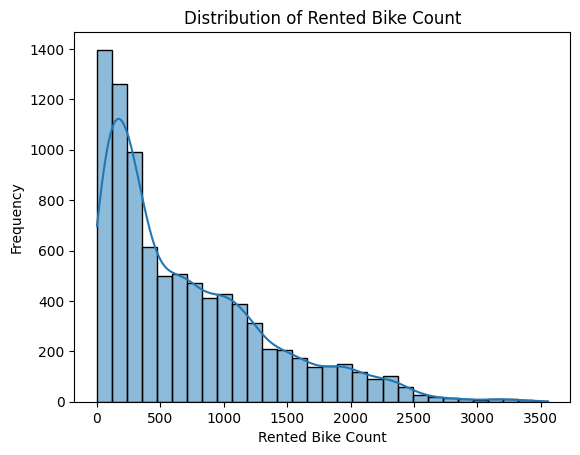

In [ ]:
# Visualize the distribution of the target variable 'Rented Bike Count'

sns.histplot(bike_df['Rented Bike Count'], bins=30, kde=True)

# Set the title of the plot
plt.title('Distribution of Rented Bike Count')

# Label the x-axis
plt.xlabel('Rented Bike Count')

# Label the y-axis
plt.ylabel('Frequency')

# Display the plot
plt.show()


##### Pairplot for Numerical Features

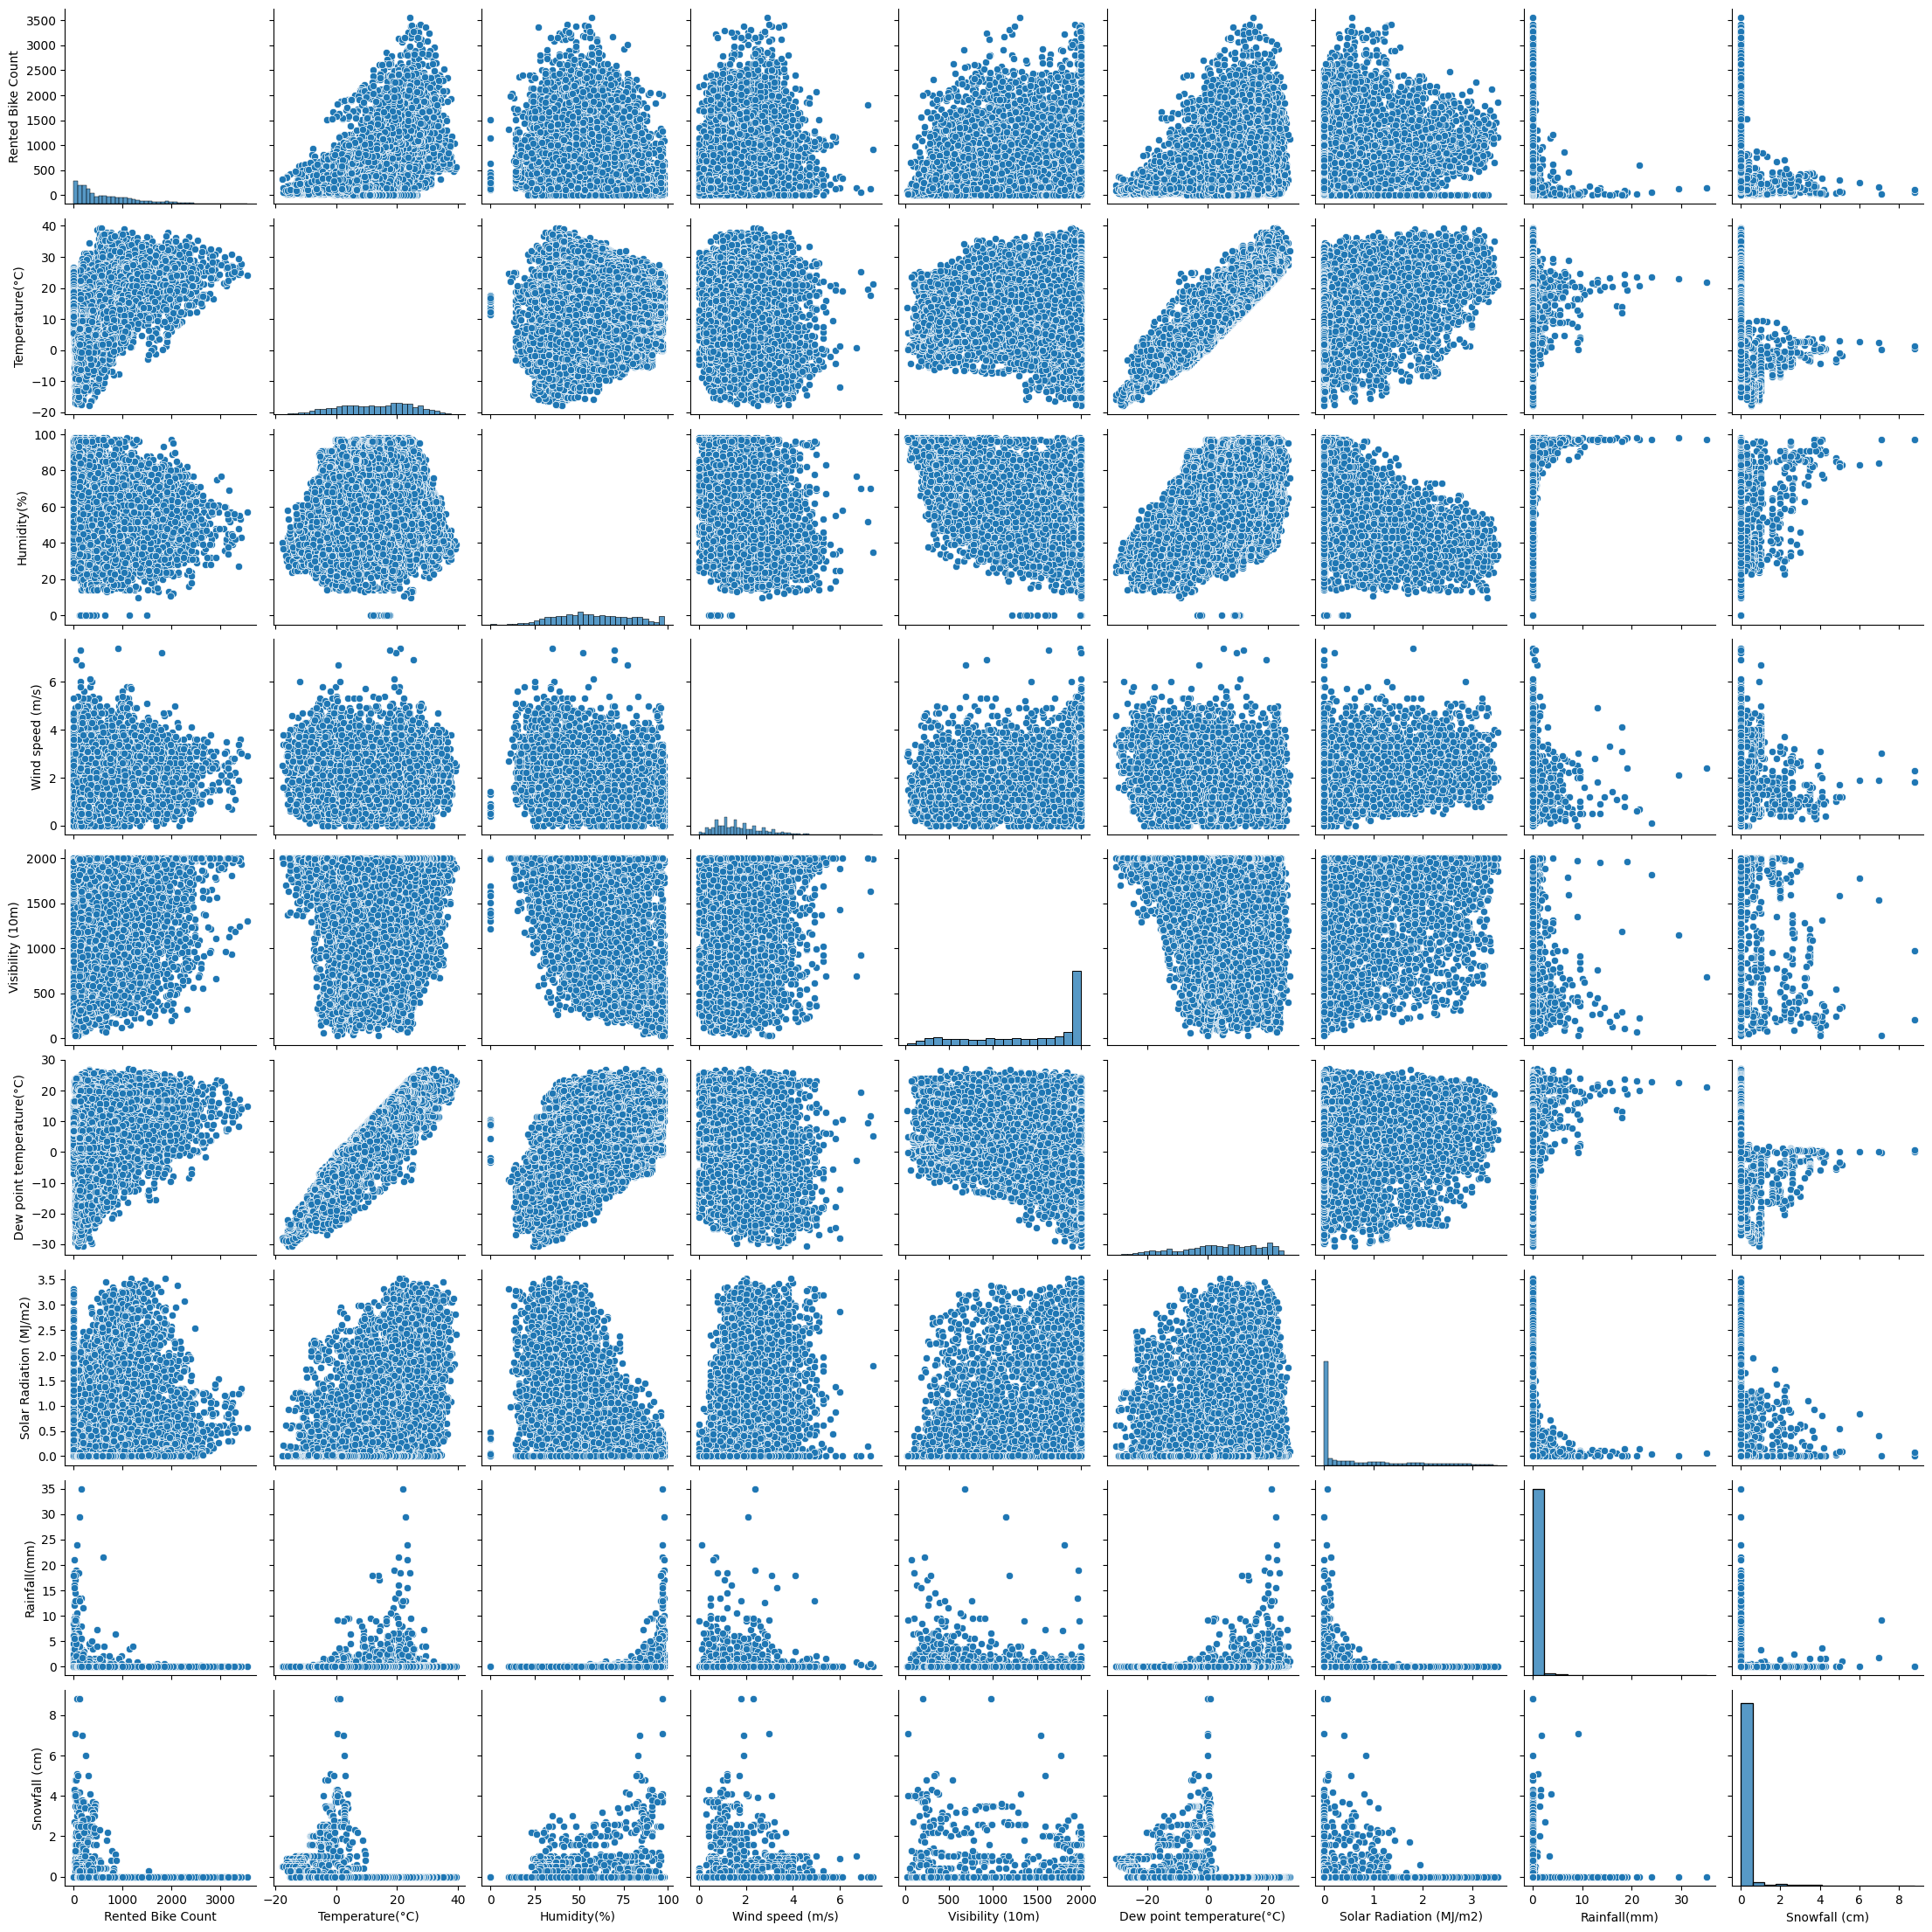

In [ ]:
# Pairplot for numerical features

# Define the list of numerical features to include in the pairplot
num_features = ['Rented Bike Count', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)',
                'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)',
                'Rainfall(mm)', 'Snowfall (cm)']

# Create a pairplot to visualize pairwise relationships among the specified numerical features
sns.pairplot(bike_df[num_features])

# Display the plot
plt.show()

#####Histograms for Numerical Features

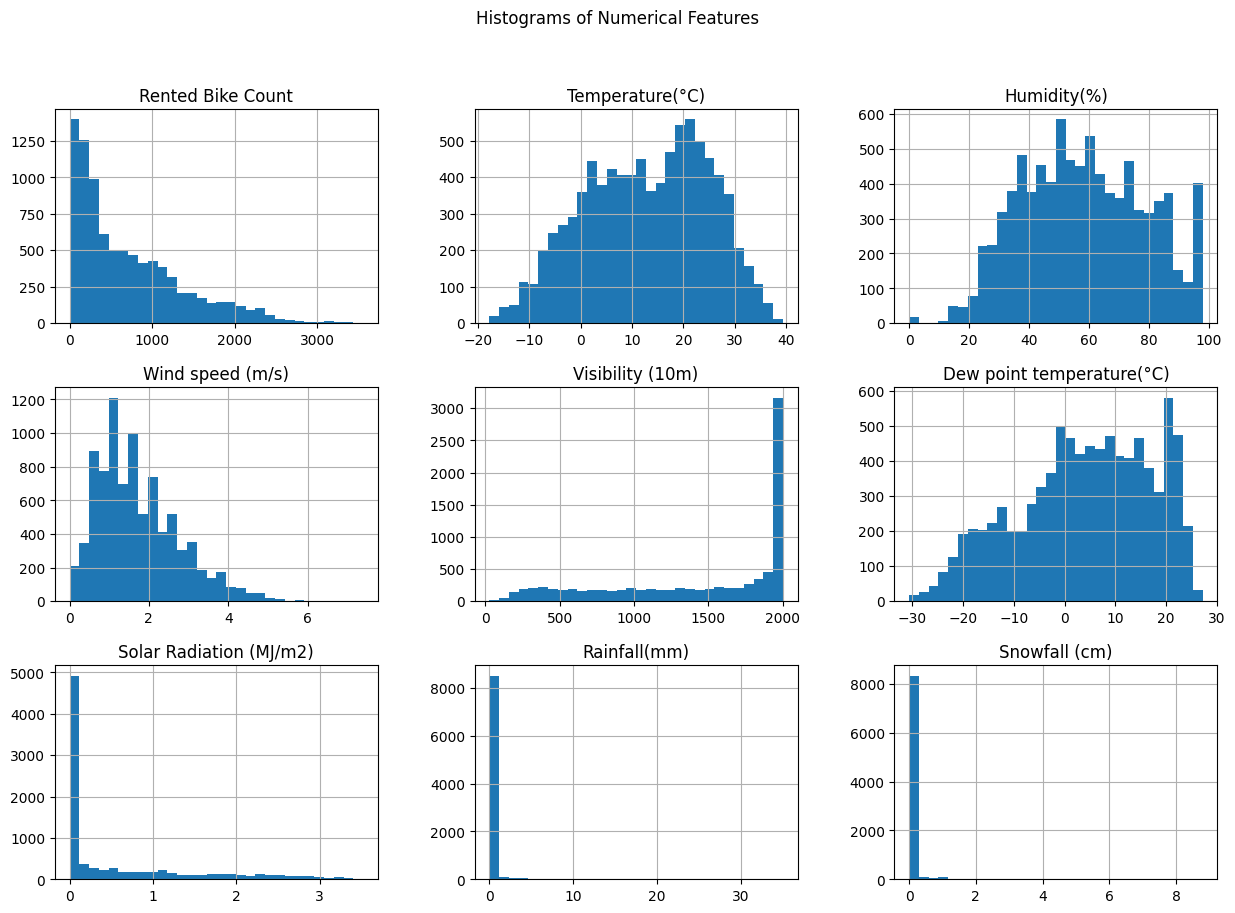

In [ ]:
# Plot histograms for the specified numerical features
bike_df[num_features].hist(bins=30, figsize=(15, 10))

# Set the main title for the histograms
plt.suptitle('Histograms of Numerical Features')

# Display the histograms
plt.show()


#####Countplots for Categorical Features

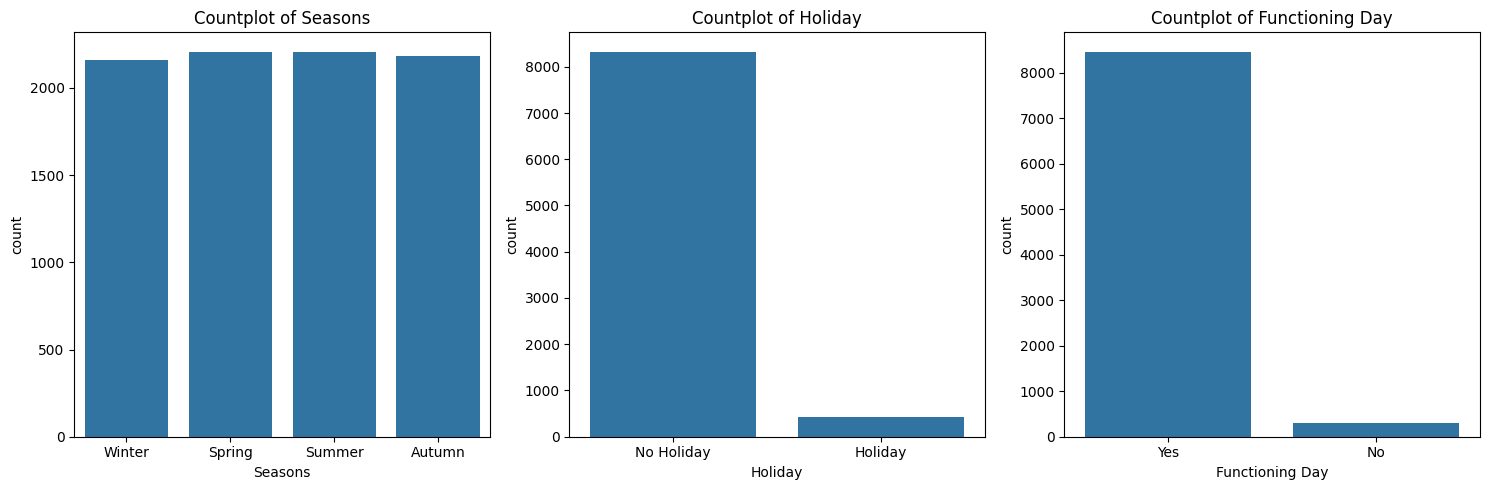

In [ ]:
# Plot countplots for categorical features
cat_features = ['Seasons', 'Holiday', 'Functioning Day']  # List of categorical features

plt.figure(figsize=(15, 5))  # Set figure size to 15x5 inches

# Iterate over categorical features to create subplots
for i, col in enumerate(cat_features, 1):
    plt.subplot(1, 3, i)  # Create a subplot in a 1x3 grid
    sns.countplot(x=bike_df[col])  # Plot countplot for each categorical feature
    plt.title(f'Countplot of {col}')  # Set the title for each subplot

plt.tight_layout()  # Adjust subplots to fit into the figure area
plt.show()  # Display the plots


## ***6. Feature Engineering & Data Pre-processing***

###Feature Enginering

In [ ]:
# Convert the 'Date' column to datetime format, specifying the format and handling errors
bike_df['Date']=pd.to_datetime(bike_df['Date'],format='%d/%m/%Y',errors='coerce')

# Extract day of the week, month, and year from the 'Date' column
bike_df['Day_of_Week'] = bike_df['Date'].dt.dayofweek  # Day of the week (0=Monday, 6=Sunday)
bike_df['Month'] = bike_df['Date'].dt.month  # Month (1=January, 12=December)
bike_df['Year'] = bike_df['Date'].dt.year  # Year (e.g., 2017)

# Create interaction features between temperature and humidity, and wind speed and visibility
bike_df['Temp_Humidity_Interaction'] = bike_df['Temperature(°C)'] * bike_df['Humidity(%)']  # Interaction of temperature and humidity
bike_df['Wind_Visibility_Interaction'] = bike_df['Wind speed (m/s)'] * bike_df['Visibility (10m)']  # Interaction of wind speed and visibility

# Create lag features for the target variable 'Rented Bike Count'
bike_df['Lag_1'] = bike_df['Rented Bike Count'].shift(1)  # Lag of 1 hour
bike_df['Lag_2'] = bike_df['Rented Bike Count'].shift(2)  # Lag of 2 hours
bike_df['Lag_3'] = bike_df['Rented Bike Count'].shift(3)  # Lag of 3 hours

# Drop rows with missing values from the DataFrame
df = bike_df.dropna()


###Categorical Encoding

In [ ]:
# Encode your categorical columns

# Perform one-hot encoding for categorical features and drop the first category to avoid multicollinearity
bike_df = pd.get_dummies(bike_df, columns=['Seasons', 'Holiday', 'Functioning Day'], drop_first=True)

###Feature Selection by Removing Multicollinearity

In [ ]:
# Calculate the absolute correlation matrix for numerical features in the DataFrame
corr_matrix = bike_df.corr().abs()

# Select the upper triangle of the correlation matrix to avoid duplicate comparisons
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Identify columns to drop based on a correlation threshold (above 0.9)
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

# Drop the identified highly correlated columns from the DataFrame
bike_df = bike_df.drop(columns=to_drop)

###Data Preprocessing: Feature Scaling and Train-Test Split

In [ ]:
# Separate features (X) and target variable (y)
X = bike_df.drop(['Rented Bike Count', 'Date'], axis=1)  # Features
y = bike_df['Rented Bike Count']  # Target variable

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


## ***7. ML Model Implementation***

###Model Initialization, Training, and Performance Evaluation

In [ ]:
# Initialize models
# Linear Regression
lr_model = LinearRegression()

# Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)

# Ridge Regression
ridge_model = Ridge()

# Train models
# Fit Linear Regression model
lr_model.fit(X_train, y_train)

# Fit Random Forest model
rf_model.fit(X_train, y_train)

# Fit Ridge Regression model
ridge_model.fit(X_train, y_train)

# Make predictions
# Predict with Linear Regression
y_pred_lr = lr_model.predict(X_test)

# Predict with Random Forest
y_pred_rf = rf_model.predict(X_test)

# Predict with Ridge Regression
y_pred_ridge = ridge_model.predict(X_test)

# Evaluate models
 # Compute MSE for Linear Regression
lr_mse = mean_squared_error(y_test, y_pred_lr)
 # Compute R2 score for Linear Regression
lr_r2 = r2_score(y_test, y_pred_lr)

# Compute MSE for Random Forest
rf_mse = mean_squared_error(y_test, y_pred_rf)
# Compute R2 score for Random Forest
rf_r2 = r2_score(y_test, y_pred_rf)

# Compute MSE for Ridge Regression
ridge_mse = mean_squared_error(y_test, y_pred_ridge)
# Compute R2 score for Ridge Regression
ridge_r2 = r2_score(y_test, y_pred_ridge)

# Print evaluation metrics

# Print Linear Regression metrics
print(f'Linear Regression MSE: {lr_mse}, R2: {lr_r2}')
# Print Random Forest metrics
print(f'Random Forest MSE: {rf_mse}, R2: {rf_r2}')
# Print Ridge Regression metrics
print(f'Ridge Regression MSE: {ridge_mse}, R2: {ridge_r2}')




Linear Regression MSE: 193603.7881283795, R2: 0.5353281258623526
Random Forest MSE: 29779.558111358452, R2: 0.9285255561765142
Ridge Regression MSE: 193577.18176377576, R2: 0.5353919842683472


###Cross-Validation Results for Model Comparison

In [ ]:
# Perform cross-validation

# Cross-validation for Linear Regression
cv_scores_lr = cross_val_score(lr_model, X_scaled, y, cv=5, scoring='neg_mean_squared_error')

# Cross-validation for Random Forest
cv_scores_rf = cross_val_score(rf_model, X_scaled, y, cv=5, scoring='neg_mean_squared_error')

# Cross-validation for Ridge Regression
cv_scores_ridge = cross_val_score(ridge_model, X_scaled, y, cv=5, scoring='neg_mean_squared_error')

# Print cross-validation results

# Print Linear Regression CV MSE
print(f'Linear Regression CV MSE: {-cv_scores_lr.mean()}')

# Print Random Forest CV MSE
print(f'Random Forest CV MSE: {-cv_scores_rf.mean()}')

# Print Ridge Regression CV MSE
print(f'Ridge Regression CV MSE: {-cv_scores_ridge.mean()}')

Linear Regression CV MSE: 352907.0830033934
Random Forest CV MSE: 106594.5178594178
Ridge Regression CV MSE: 336726.7479168102


###Feature Importance Visualization and Model Residuals Analysis

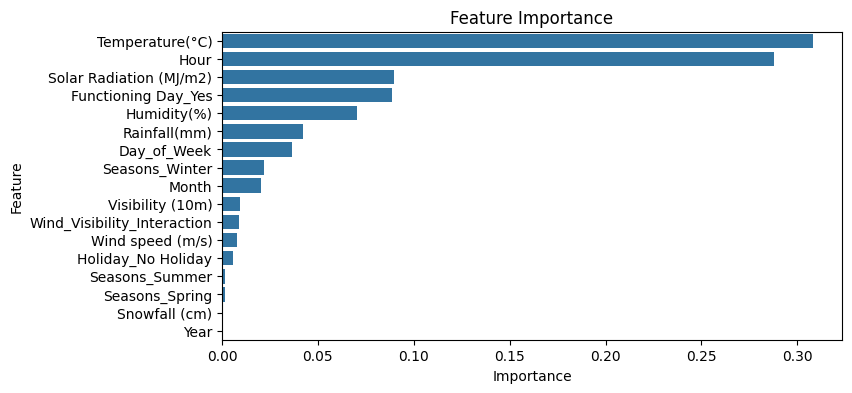

In [ ]:
# Feature importance from Random Forest
 # Get feature importances
importances = rf_model.feature_importances_
# Feature names
features = X.columns
# Create DataFrame and sort
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8, 4))
# Plot feature importance
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.show()


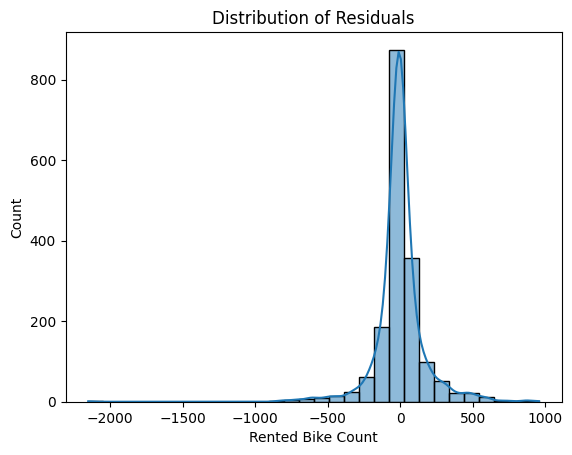

In [ ]:
# Evaluating Residuals
# Calculate residuals
residuals = y_test - y_pred_rf
# Plot distribution of residuals
sns.histplot(residuals, bins=30, kde=True)
plt.title('Distribution of Residuals')
plt.show()

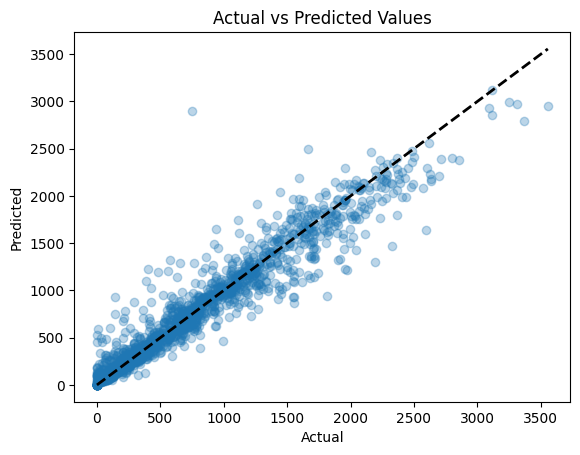

In [ ]:
# Scatter plot of actual vs predicted values
# Scatter plot
plt.scatter(y_test, y_pred_rf, alpha=0.3)
# Diagonal line for reference
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()

###Insights into Model Behavior: Feature Significance

To gain insights into the model's behavior, we analyze feature importance, particularly using the Random Forest model. This approach helps identify which features most significantly affect bike demand predictions.

Temperature: Temperature emerged as a key factor, significantly influencing bike rentals. Higher temperatures generally correlate with increased bike usage, as favorable weather encourages more people to rent bikes.

Hour of the Day: The time of day was another critical factor. Bike demand peaks during commuting hours, such as in the morning and evening, highlighting its importance in predicting rental patterns.

Humidity and Wind Speed: These weather-related variables also played a notable role. Extreme conditions, such as high humidity or strong winds, can negatively impact bike rental numbers.

Visualizing feature importance helps us understand how various factors contribute to the model’s predictions, enabling us to prioritize the most impactful variables in our analysis.

# **Conclusion**

This project aimed to predict bike demand to ensure optimal availability for users. Through effective preprocessing, including feature selection and engineering, and by evaluating several models—Linear Regression, Random Forest, and Ridge Regression—we found that the Random Forest model performed the best.

The models offer valuable insights for bike-sharing services, helping them allocate bikes more efficiently, reduce waiting times, and enhance customer satisfaction. By predicting demand accurately, the project supports better fleet management and operational cost savings.

Future improvements could involve incorporating additional data sources and advanced modeling techniques. Overall, the project demonstrates how predictive analytics can significantly improve bike-sharing operations and urban mobility.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***